# Lab 3: Intro to GeoPy
## Visualization in Spatial Data Analysis
## Author: Ali Syed

### Attribute Distribution (a-spatial)

In [2]:
%pip install geopandas

import pandas as pd
import geopandas as gpd
#import libpysal.api as lp
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
import contextily as ctx
import shapely.geometry as geom
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = gpd.read_file('airbnb_Chicago 2015.shp')
df.head()

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,POLYGON ((-87.60914087617012 41.84469250346108...
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.592152838785 41.81692934706861, ..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,POLYGON ((-87.62879823732874 41.80189303448802...
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,POLYGON ((-87.60670812560372 41.81681377137391...
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.592152838785 41.81692934706861, ..."


In [4]:
pd.isnull(df['price_pp']).sum()

8

In [5]:
df['price_pp'].fillna((df['price_pp'].mean()), inplace=True)

In [6]:
import seaborn as sbn

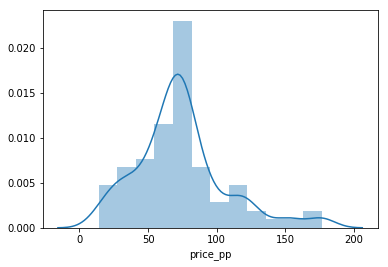

In [7]:
sbn.distplot(df['price_pp'])

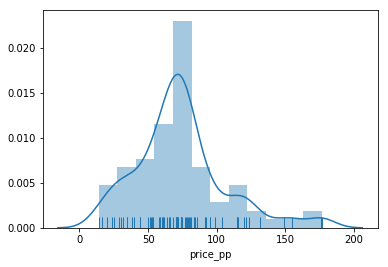

In [8]:
sbn.distplot(df['price_pp'], rug=True)

### Spatial Distribution - Geovisualization

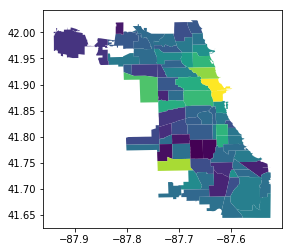

In [9]:
df.plot(column='price_pp')

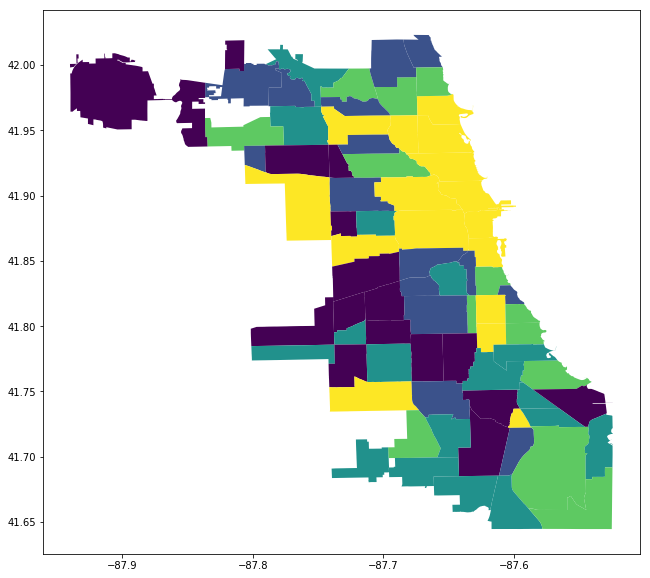

In [10]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', ax=ax)

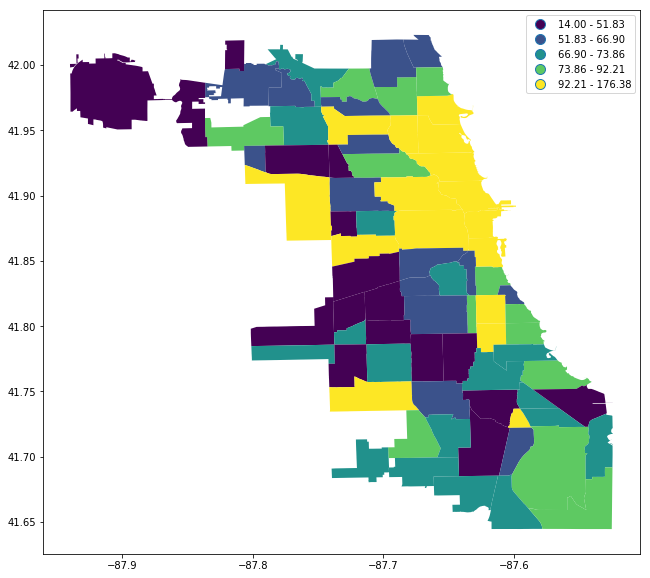

In [11]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', legend=True, ax=ax)

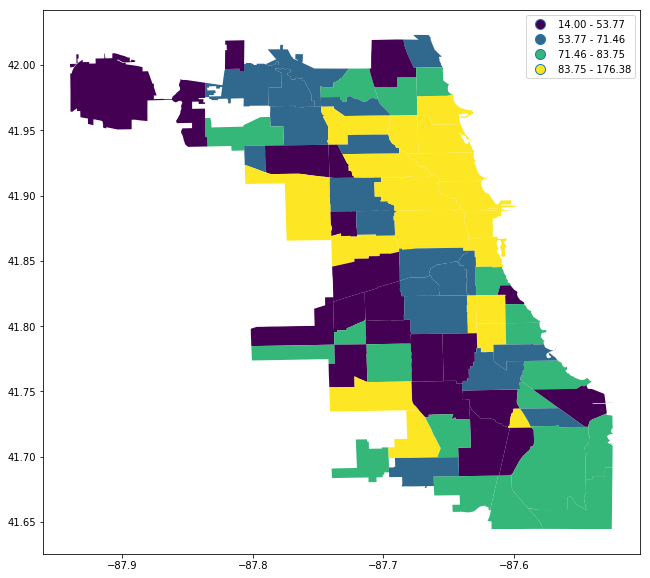

In [12]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', legend=True, k=4, ax=ax)

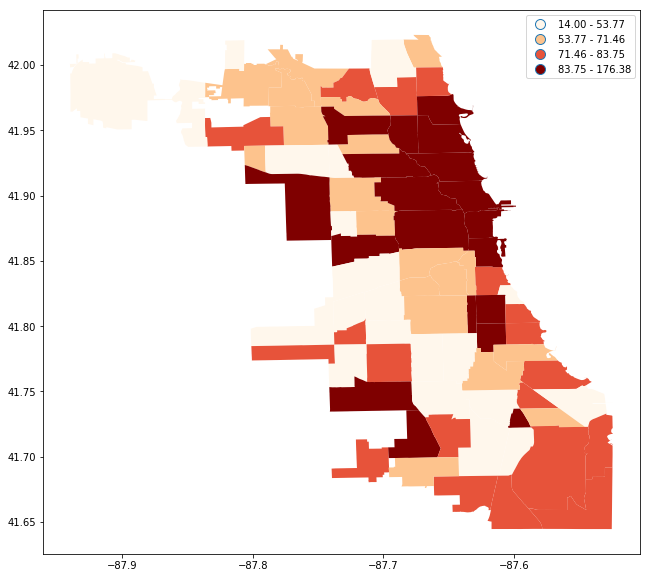

In [13]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', legend=True, k=4, ax=ax, cmap="OrRd")

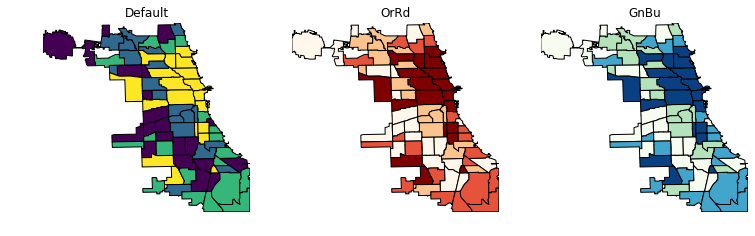

In [14]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))

# Map 1: default
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Default")

# Map 2: OrRd
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("OrRd")

# Map 3: GnBu
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("GnBu")

# axis settings
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

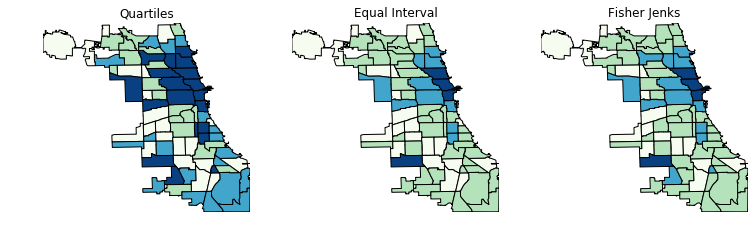

In [16]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))

df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles", cmap='GnBu', k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Quartiles")

df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='equal_interval', cmap='GnBu', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Equal Interval")

df.plot(column='price_pp', ax=ax[2], edgecolor='k',
       scheme='fisher_jenks', cmap='GnBu', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("Fisher Jenks")

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

In [18]:
import mapclassify as mc

In [19]:
mc.CLASSIFIERS

('Box_Plot',
 'Equal_Interval',
 'Fisher_Jenks',
 'Fisher_Jenks_Sampled',
 'HeadTail_Breaks',
 'Jenks_Caspall',
 'Jenks_Caspall_Forced',
 'Jenks_Caspall_Sampled',
 'Max_P_Classifier',
 'Maximum_Breaks',
 'Natural_Breaks',
 'Quantiles',
 'Percentiles',
 'Std_Mean',
 'User_Defined')

In [20]:
y = df['price_pp']
ea5 = mc.Equal_Interval(y, k=5)
ea5.yb

array([1, 1, 2, 3, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 3, 3, 2, 0, 1, 2, 1, 1, 4, 4, 2, 0, 1, 0, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 4, 4, 1, 2, 1, 1, 1, 0, 1, 0])

In [24]:
q5 = mc.Quantiles(y, k=5)
q5

                Quantiles                 
 
 Lower            Upper              Count
          x[i] <=  51.833               16
 51.833 < x[i] <=  66.897               15
 66.897 < x[i] <=  73.864               17
 73.864 < x[i] <=  92.206               13
 92.206 < x[i] <= 176.376               16

In [26]:
y.shape

(77,)

In [27]:
np.unique(y).shape

(67,)

### Selecting a classification based on fit

In [28]:
q5 = mc.Quantiles(y, k=5)
ei5 = mc.Equal_Interval(y, k=5)
mb5 = mc.Maximum_Breaks(y, k=5)
fj5 = mc.Fisher_Jenks(y, k=5)
fits = [c.adcm for c in [q5, ei5, mb5, fj5]]
fits

[598.0520588840582, 539.643737884058, 1096.390616884058, 488.9713821014492]

### Outlier Detection

In [29]:
ht = mc.HeadTail_Breaks(y)
ht

             HeadTail_Breaks              
 
 Lower            Upper              Count
          x[i] <=  73.864               48
 73.864 < x[i] <=  98.160               16
 98.160 < x[i] <= 130.727                8
130.727 < x[i] <= 157.566                3
157.566 < x[i] <= 176.254                1
176.254 < x[i] <= 176.376                1

In [30]:
std = mc.Std_Mean(y)
std

                 Std_Mean                 
 
 Lower            Upper              Count
          x[i] <=   7.250                0
  7.250 < x[i] <=  40.557               12
 40.557 < x[i] <= 107.170               54
107.170 < x[i] <= 140.477                7
140.477 < x[i] <= 176.376                4

In [31]:
bp = mc.Box_Plot(y)
bp

                 Box Plot                 
 
 Lower            Upper              Count
          x[i] <=   8.812                0
  8.812 < x[i] <=  53.775               20
 53.775 < x[i] <=  71.458               19
 71.458 < x[i] <=  83.750               19
 83.750 < x[i] <= 128.713               14
128.713 < x[i] <= 176.376                5

### Using mapclassify with GeoPandas

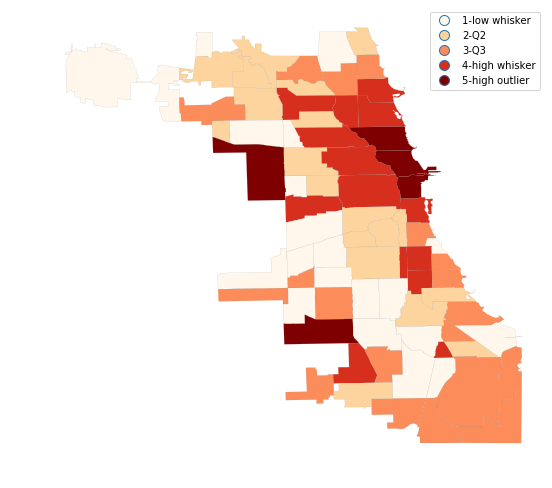

In [32]:
labels = ['0-low outlier', '1-low whisker',
          '2-Q2', '3-Q3', '4-high whisker', '5-high outlier']
bpl = [ labels[b] for b in bp.yb ]

f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=bpl).plot(column='cl', categorical=True, \
                                      k=5, cmap='OrRd', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()